In [1]:
import sparse_ir
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

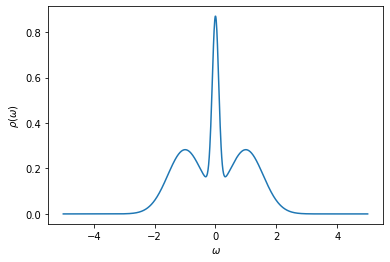

In [2]:
# Three Gaussian peaks (normalized to 1)
gaussian = lambda x, mu, sigma:\
    np.exp(-((x-mu)/sigma)**2)/(np.sqrt(np.pi)*sigma)

rho = lambda omega: 0.2*gaussian(omega, 0.0, 0.15) + \
    0.4*gaussian(omega, 1.0, 0.8) + 0.4*gaussian(omega, -1.0, 0.8)

omegas = np.linspace(-5, 5, 1000)
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\rho(\omega)$")
plt.plot(omegas, rho(omegas))
plt.show()

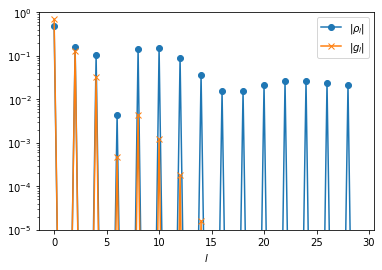

In [3]:
beta = 10
wmax = 10
basis = sparse_ir.FiniteTempBasis("F", beta, wmax, eps=1e-10)

rhol = basis.v.overlap(rho)
gl = - basis.s * rhol

plt.semilogy(np.abs(rhol), marker="o", label=r"$|\rho_l|$")
plt.semilogy(np.abs(gl), marker="x", label=r"$|g_l|$")
plt.xlabel(r"$l$")
plt.ylim([1e-5, 1])
plt.legend()
plt.show()

In [4]:
smpl_matsu = sparse_ir.MatsubaraSampling(basis)
smpl_matsu.wn

array([-229, -217,  -93,  -55,  -39,  -29,  -23,  -17,  -15,  -13,  -11,
         -9,   -7,   -5,   -3,   -1,    1,    3,    5,    7,    9,   11,
         13,   15,   17,   23,   29,   39,   55,   93,  217,  229])

In [5]:
gw = smpl_matsu.evaluate(gl)
gw

array([ 3.83941359e-20+0.01389715j,  1.63706753e-18+0.01466532j,
        1.18162299e-18+0.03418456j, -2.45510436e-18+0.05767104j,
        3.37491147e-18+0.0810517j ,  9.56437779e-18+0.10840216j,
       -1.95484504e-19+0.13571369j,  8.56892662e-18+0.18082697j,
        9.34699215e-18+0.20306245j,  2.36713905e-17+0.23122163j,
        4.15003189e-17+0.26786199j,  5.13561790e-17+0.317118j  ,
        2.73107270e-17+0.38599173j,  5.60067967e-17+0.48713053j,
        2.62656260e-17+0.64832385j,  9.85527490e-17+1.05017892j,
        9.85527490e-17-1.05017892j,  2.62656260e-17-0.64832385j,
        5.60067967e-17-0.48713053j,  2.73107270e-17-0.38599173j,
        5.13561790e-17-0.317118j  ,  4.15003189e-17-0.26786199j,
        2.36713905e-17-0.23122163j,  9.34699215e-18-0.20306245j,
        8.56892662e-18-0.18082697j, -1.95484504e-19-0.13571369j,
        9.56437779e-18-0.10840216j,  3.37491147e-18-0.0810517j ,
       -2.45510436e-18-0.05767104j,  1.18162299e-18-0.03418456j,
        1.63706753e-18-0.

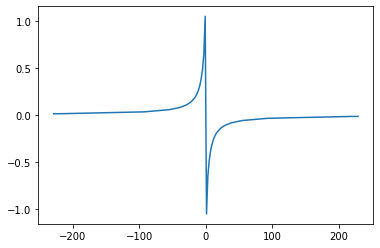

In [6]:
#taus = np.linspace(0, beta, 1000)
smpl_matsu = sparse_ir.MatsubaraSampling(basis)
gw = smpl_matsu.evaluate(gl)
plt.plot(smpl_matsu.wn, gw.imag)
#plt.xlabel(r"$\tau$")
#plt.ylabel(r"$G(\tau)$")
#plt.show()